In [1]:
import matplotlib.pyplot as plt
import numpy as np

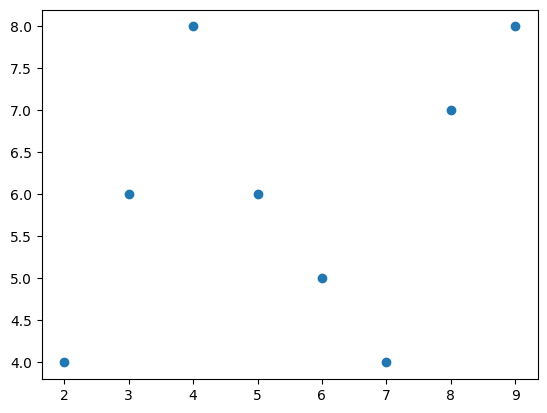

In [4]:
X = np.array([2, 3, 4, 5, 6, 7, 8, 9])
Y = np.array([4, 6, 8, 6, 5, 4, 7, 8])


plt.scatter(X, Y)

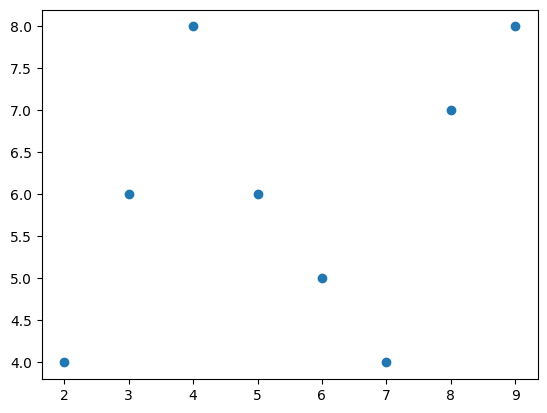

In [5]:
# prompt: change the shape of X and Y , make it like column shape .. i mean one columns and rows should equal no. of entry which array has

import matplotlib.pyplot as plt
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
plt.scatter(X, Y)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [18]:
model.score(X,Y)

0.1322751322751322

In [20]:
y_pred = model.predict(X)
y_pred

array([[5.16666667],
       [5.4047619 ],
       [5.64285714],
       [5.88095238],
       [6.11904762],
       [6.35714286],
       [6.5952381 ],
       [6.83333333]])

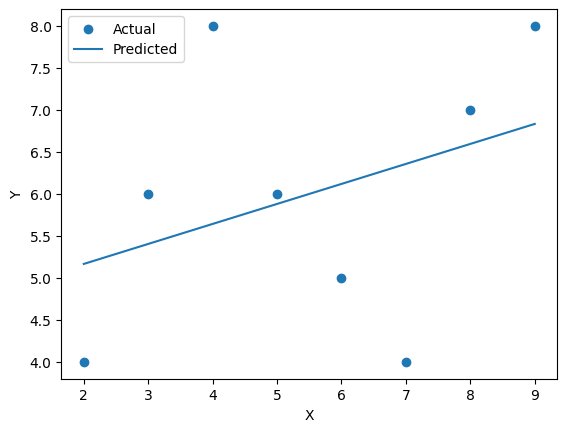

In [21]:
plt.scatter(X,Y,label='Actual')
plt.plot(X,y_pred,label='Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [22]:
from sklearn.preprocessing import PolynomialFeatures

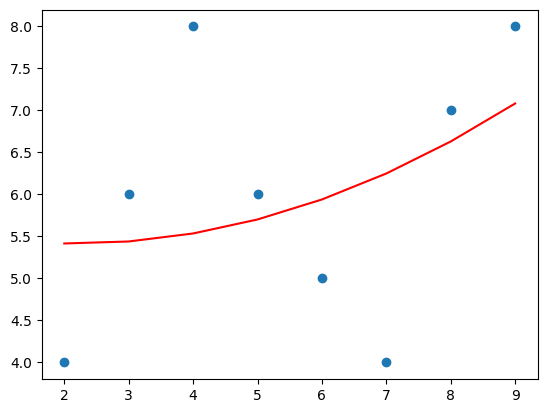

In [24]:
poly = PolynomialFeatures(degree=2)
poly_x = poly.fit_transform(X)
model1 = LinearRegression()
model1.fit(poly_x, Y)
y_pred = model1.predict(poly_x)
plt.scatter(X, Y)
plt.plot(X, y_pred, c='red')
plt.show()


In [42]:
def play_with_degree(degree):
  poly = PolynomialFeatures(degree=degree)
  poly_x = poly.fit_transform(X)
  model1 = LinearRegression()
  model1.fit(poly_x, Y)
  y_pred = model1.predict(poly_x)
  print(model1.score(poly_x,Y))
  plt.scatter(X, Y,label="Actual")
  plt.plot(X, y_pred, c='red',label="Predicted")
  plt.legend()
  plt.show()


0.13227513227513232


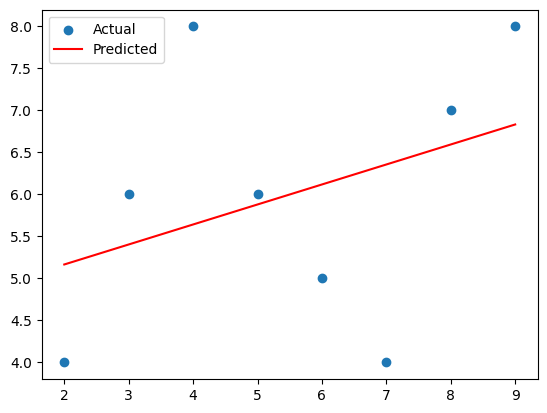

In [43]:
play_with_degree(1)

0.9562289562289579


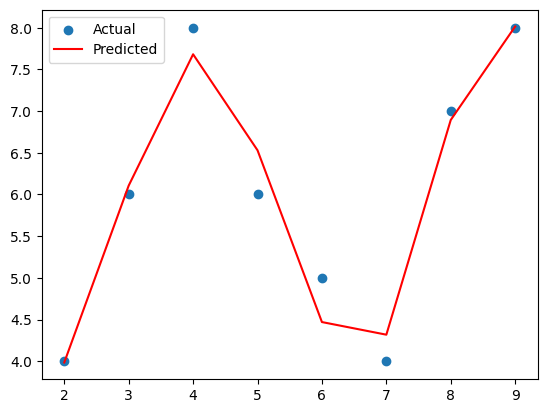

In [45]:
play_with_degree(6)

In [46]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.linear_model import LinearRegression,RANSACRegressor
import matplotlib.pyplot as plt

In [59]:
x, y = make_regression(n_samples=200000, n_features=1,noise=10,random_state=0)
outliers = 30000
np.random.seed(2)
y[:outliers] = 1000 + np.random.normal(size=(outliers))

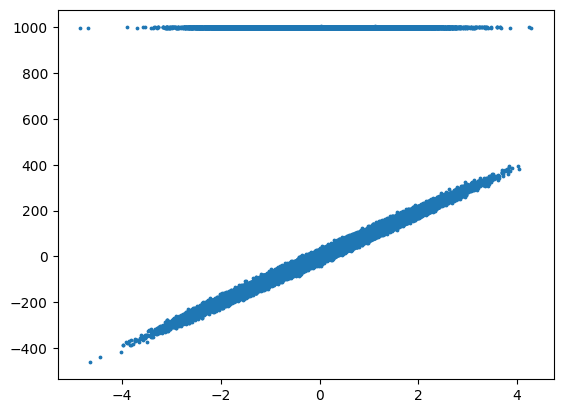

In [60]:
plt.scatter(x,y,s=3)
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

In [62]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
rr = RANSACRegressor()
rr.fit(X_train, y_train)

RANSACRegressor()

In [64]:
rr_pred = rr.predict(X_test)
lr_pred = lr.predict(X_test)

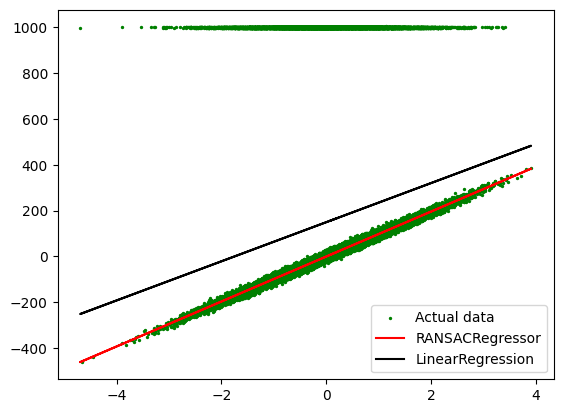

In [65]:
plt.scatter(X_test, y_test, label='Actual data',c="green",s=2)
plt.plot(X_test,rr_pred,label='RANSACRegressor',c="red")
plt.plot(X_test,lr_pred, label='LinearRegression',c="black")
plt.legend()